<a href="https://colab.research.google.com/github/PikoAll/machine-learning-e-deep-learning/blob/main/RetiNeuraliSettaggi%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ReteNeurale
molto utile per immaggini,video,audio e testi                                   
Caricamento img in tensori, estimator, CNN
CNN per MNIST e CELEBA
Uso di dataAugmentation per prevenire l'overfitting

carichiamo MNIST

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

y=y.astype(int)
X=((X/255.)-.5)*2

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000,random_state=123,stratify=y)

print('X_train:',X_train.shape)
print('y_train:',y_train.shape)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

Immaginare che i tensori sono degli array
#creazione di tensori a partire da una lista o un array

In [ ]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)

a=np.array([1,2,3],dtype=np.int32)
b=[4,5,6]

t_a=tf.convert_to_tensor(a)
t_b=tf.convert_to_tensor(b)

print(t_a)
print(t_b)

print(t_a.shape)

In [ ]:
t_a_new=tf.cast(t_a,tf.int64) #per fare il cast

#creo un tensore indicando la forma e poi faccio la trasposya
t=tf.random.uniform(shape=(3,5))
t_tr=tf.transpose(t)
print(t)
print(t_tr)
print('\n')
# ---------------Cambioforma diun tensore da 1D a 2D
t=tf.zeros((30,))
t_reshape=tf.reshape(t,shape=(5,6))
print(t)
print(t_reshape)
print('\n')


Ora carico un dataset di 6 img dal locale

In [ ]:
import pathlib

imgdir_path = pathlib.Path('img')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

#visualizzo le immagini caricate
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
# plt.savefig('ch13-catdot-examples.pdf')
plt.tight_layout()
plt.show()

In [ ]:
#le etichette sono i nomi dei file, quindi ora assegneremo 1 ai cani 0 ai gatti
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print('etichette',labels)

#ora creo un dataset aggiungento alle immagini le lore etichette(un dataset tensorflow)
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

# -------------- Carico le img e faccio un risize
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), 
                 size=15)
    
plt.tight_layout()
#plt.savefig('ch13-catdog-dataset.pdf')
plt.show()

uso di iris

In [ ]:
import tensorflow_datasets as tfds
iris,irisInfo=tfds.load('iris',with_info=True)
print(irisInfo)

ds_orig=iris['train']
ds_orig=dsOrigin.shuffle(150,reshuffle_each_iteration=False)


ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

next(iter(ds_train_orig))

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(16,activation='sigmoid',name='fc1', input_shape=(4,)),
                           tf.keras.layers.Dense(3,activation='softmax',name='fc2')
                           
])
model.summary()

In [ ]:
model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)

ora plotto i grafici per vedere che andamento c'e stato per ogni epoca

In [ ]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

In [ ]:
results = model.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

#Salvataggio e ricarica del modello

In [ ]:
model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

iris_model_new.summary()

results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

per layer nascosti si consiglia di usare come funzione di attivazionetangente iperbolica,
la funzione di attivazione sigmoide(imita abbastanza bene il comportamento del cervello)

In [ ]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16, 
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    ))

model.add(
    tf.keras.layers.Dense(
        units=32, 
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    ))

model.build(input_shape=(None, 4))
model.summary()

Alternativa alla creazione di un modello

In [ ]:
tf.random.set_seed(1)

## input layer:
inputs = tf.keras.Input(shape=(2,))

## layer nascosti
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

## output:
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

## construct a model:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

#Estimator
Gli stimatori rappresentano un modello completo ma sembrano anche abbastanza intuitivi per meno utenti. L'API Estimator fornisce metodi per addestrare il modello, giudicare l'accuratezza del modello e generare previsioni.
Gli stimatori racchiudono quattro caratteristiche principali:
Addestramento: formeranno un modello su un dato input per un numero fisso di passaggi
Valutazione : valuteranno il modello in base a un set di test.
Previsione : gli stimatori eseguiranno l'inferenza utilizzando il modello addestrato.
Esporta il tuo modello per la pubblicazione .
Inoltre, lo stimatore include il comportamento predefinito comune ai lavori di addestramento, come il salvataggio e il ripristino dei checkpoint, la creazione di riepiloghi, ecc. Uno stimatore richiederà di scrivere un model_fn e un input_fn che corrispondono al modello e alle parti di input del tuo TensorFlow grafico.
Gli stimatori hanno numerosi vantaggi:
Gli stimatori semplificano la condivisione delle implementazioni tra gli sviluppatori di modelli.
Puoi sviluppare un ottimo modello con codice intuitivo di alto livello, poiché di solito sono più facili da usare se devi creare modelli rispetto alle API TensorFlow di basso livello.
Gli stimatori stessi sono costruiti su tf.keras.layers, il che rende la personalizzazione molto più semplice.
Gli stimatori ti semplificheranno la vita costruendo il grafico per te.
Gli stimatori forniscono un ciclo di formazione distribuito in modo sicuro che controlla come e quando:
costruisci il grafico
inizializzare le variabili
caricare dati
gestire le eccezioni
creare file di checkpoint e recuperare da errori
salva i riepiloghi per TensorBoard

uso di estimator su dataset MNIST

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20
steps_per_epoch = np.ceil(60000 / BATCH_SIZE)

#Preprocess image

In [ ]:
def preprocess(item):
  image=item['image']
  label=item['label']
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.reshape(image,(-1,))
  return {'image-pixels':image}, label[..., tf.newaxis]


Passo uno, defifinre due funzioni una per l'addestramento e una per la valutazione

In [ ]:
def train_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_train = datasets['train']

    dataset = mnist_train.map(preprocess)
    dataset = dataset.shuffle(BUFFER_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset.repeat()

def eval_input_fn():
    datasets = tfds.load(name='mnist')
    mnist_test = datasets['test']
    dataset = mnist_test.map(preprocess).batch(BATCH_SIZE)
    return dataset

#definizione delle colonne delle carateristiche
## Step 2: feature column
image_feature_column = tf.feature_column.numeric_column(
    key='image-pixels', shape=(28*28))################################################################

Estimator

In [ ]:
dnn_classifier=tf.estimator.DNNClassifier(
    feature_columns=[image_feature_column],
    hidden_units=[32,16],
    n_classes=10,
    model_dir='models/mnist-dnn/')

dnn_classifier.train(
    input_fn=train_input_fn,
    steps=NUM_EPOCHS * steps_per_epoch)

eval_result = dnn_classifier.evaluate(
    input_fn=eval_input_fn)

print(eval_result)

oppure

In [ ]:
## Step 1: Define the input functions
def train_input_fn(x_train, y_train, batch_size=8):
    dataset = tf.data.Dataset.from_tensor_slices(
        ({'input-features':x_train}, y_train.reshape(-1, 1)))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(100).repeat().batch(batch_size)

def eval_input_fn(x_test, y_test=None, batch_size=8):
    if y_test is None:
        dataset = tf.data.Dataset.from_tensor_slices(
            {'input-features':x_test})
    else:
        dataset = tf.data.Dataset.from_tensor_slices(
            ({'input-features':x_test}, y_test.reshape(-1, 1)))


    # Shuffle, repeat, and batch the examples.
    return dataset.batch(batch_size)


## Step 2: Define the feature columns
features = [
    tf.feature_column.numeric_column(
        key='input-features:', shape=(2,))
]

In [ ]:
## Set random seeds for reproducibility
tf.random.set_seed(1)
np.random.seed(1)

## Create the data
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

In [ ]:
## Step 3: Create the estimator: convert from a Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), name='input-features'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

my_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model,
    model_dir='models/estimator-for-XOR/')


num_epochs = 200
batch_size = 2
steps_per_epoch = np.ceil(len(x_train) / batch_size)

my_estimator.train(
    input_fn=lambda: train_input_fn(x_train, y_train, batch_size),
    #steps=num_epochs * steps_per_epoch
    steps=100
    )

#CNN

Conv2D molto utile,pooling(riduce le caratteristiche), regolarizzazione L1 e L2 servono pre prevenire l'overfitting, la scelta più comune e L2, usare il dropout per prevenire l'overfitting

Per ogni livelloe possibile mettere :
Conv2D(filter=16,kernel_size=(3,3), kernel_regularizer=kernel_regularizers.l2(0.001)                                                                           

per il dropout mettere 0.5                                                      
usare regolarizzazione ReLU nei livelli intermedi,

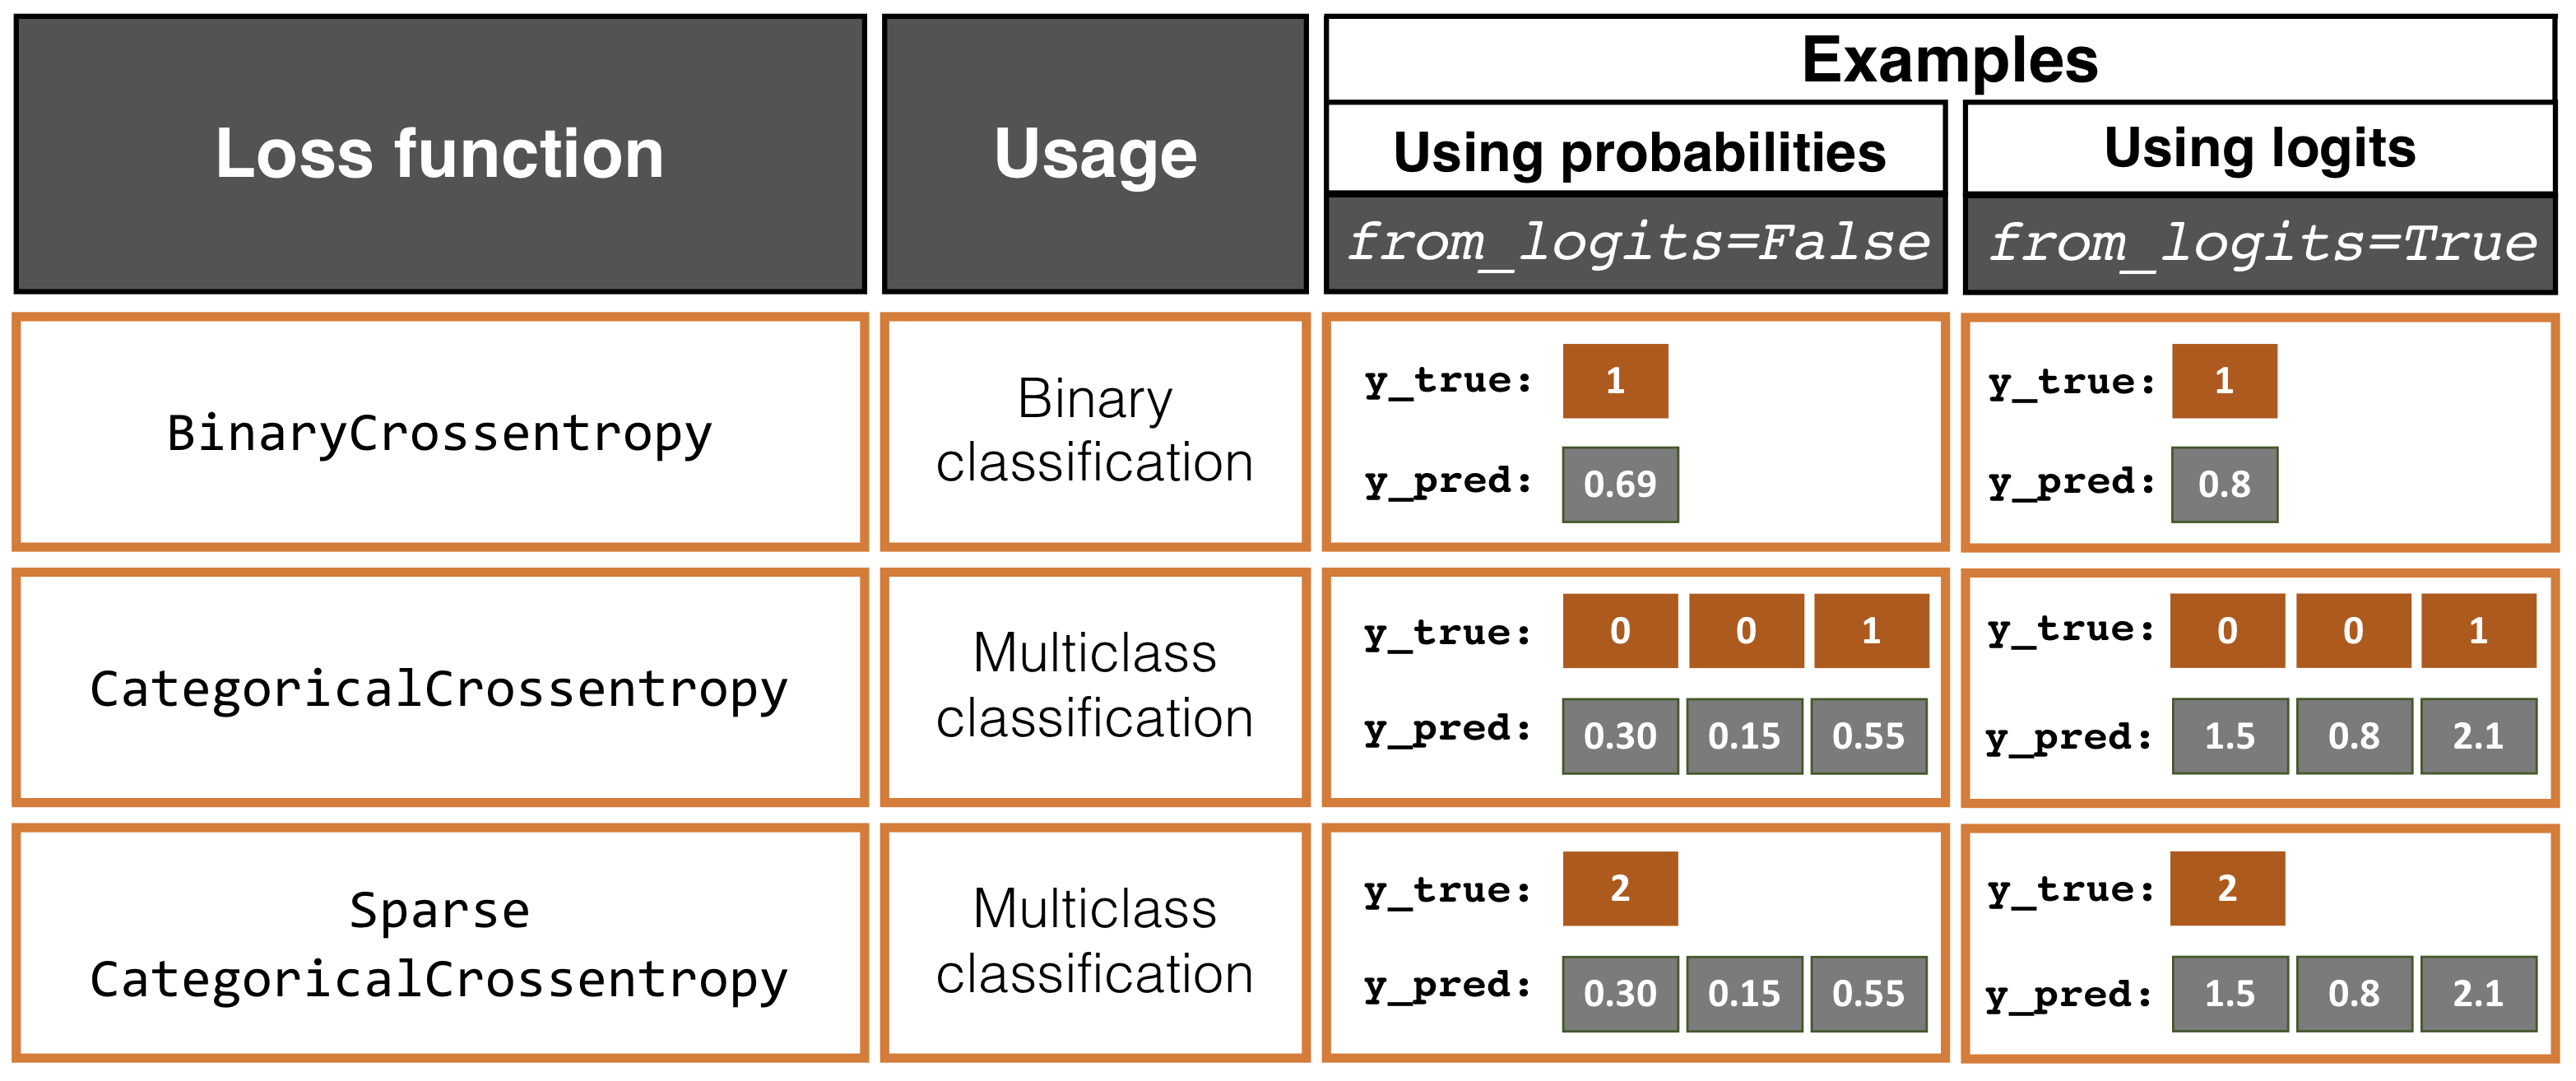

Caricamento e preelaborazione dei dati dataset MNIST

In [ ]:
import tensorflow_datasets as tfds

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

Preelaboro e creo un dataset di convalida

In [ ]:
import tensorflow as tf

BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='same',data_format='channels_last',name='conv1',activation='relu'))#data_format='channels_last' mi permette di ommetere le dimensioni
model.add(MaxPool2D(pool_size=(2,2),name='pool1'))
model.add(Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',name='conv2',activation='relu')) #5x5 indica la dimensione del kernel, padding0'same' mantiene le dimensioni spaziali
model.add(MaxPool2D(pool_size=(2,2),name='pool2'))

model.add(Flatten())#fare questo poiche alla livello sucessiovo non arrivi una dimensione maggiore da lui richiesta
model.add(Dense(units='1024',name='fc1',activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10,name='fc2',activation='softmax'))

In [ ]:
tf.random.set_seed(1)
model.compile(optimizer=tf.keras.optimizers.Adam(), #alternative ad adam sono RMSProp e AdaGrad
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

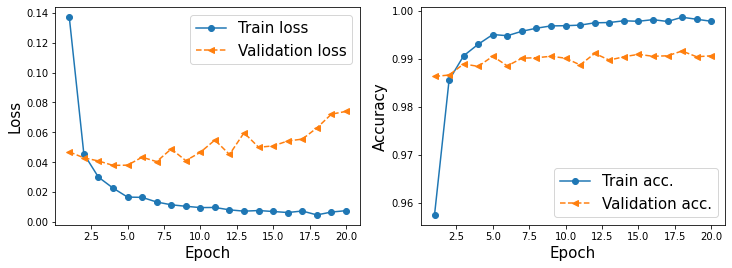

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [ ]:
test_results = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 1s 2ms/step - loss: 0.0522 - accuracy: 0.9921

Test Acc. 99.21%


TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


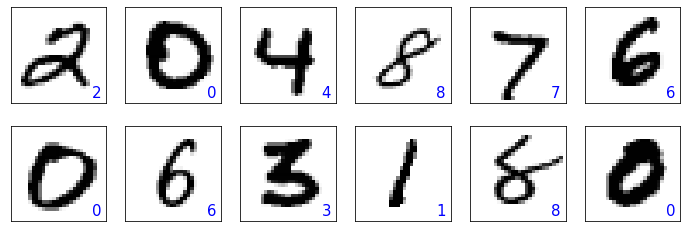

In [ ]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

Altro metodo per processare

In [ ]:
def preprocess(example, size=(64, 64), mode='train'):
    image = example['image']
    label = example['attributes']['Male']
    if mode == 'train':
        image_cropped = tf.image.random_crop(
            image, size=(178, 178, 3))
        image_resized = tf.image.resize(
            image_cropped, size=size)
        image_flip = tf.image.random_flip_left_right(
            image_resized)
        return (image_flip/255.0, tf.cast(label, tf.int32))
    
    else:
        image_cropped = tf.image.crop_to_bounding_box(
            image, offset_height=20, offset_width=0,
            target_height=178, target_width=178)
        image_resized = tf.image.resize(
            image_cropped, size=size)
        return (image_resized/255.0, tf.cast(label, tf.int32))

BATCH_SIZE = 32
BUFFER_SIZE = 1000
IMAGE_SIZE = (64, 64)
steps_per_epoch = np.ceil(16000/BATCH_SIZE)
print(steps_per_epoch)

ds_train = celeba_train.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='train'))
ds_train = ds_train.shuffle(buffer_size=BUFFER_SIZE).repeat()
ds_train = ds_train.batch(BATCH_SIZE)

ds_valid = celeba_valid.map(
    lambda x: preprocess(x, size=IMAGE_SIZE, mode='eval'))
ds_valid = ds_valid.batch(BATCH_SIZE)

Altra rete

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(
        128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(
        256, (3, 3), padding='same', activation='relu'),
])


model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(10, activation=None))   

In [ ]:
tf.random.set_seed(1)
model.compile(optimizer=tf.keras.optimizers.Adam(), #alternative ad adam sono RMSProp e AdaGrad
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)